In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_plot(filePath, labelx, line_style, marker_style):
    df = pd.read_csv(filePath)
    

    # df['zscore'] = np.abs(stats.zscore(df['encrypt']))
    # threshold = 3
    
    # df_filtered = df[df['zscore'] < threshold]
    
    # polynomial = np.poly1d(np.polyfit(df_filtered['Buffer'], df_filtered['encrypt'], 7))
    # df_filtered['se_encrypt_fitted'] = polynomial(df_filtered['Buffer'])

    # df_filtered['encrypt_ema'] = df_filtered['encrypt'].ewm(span=9, adjust=False).mean()
    # df.loc[df['zscore'] > threshold, 'encrypt'] = np.men
    # df['encrypt_filtered'] = df['encrypt'].interpolate()  # Linear interpolation


    min_se_encrypt_row = df.loc[df['encrypt'].idxmin()]

    min_buffer_size = min_se_encrypt_row['Buffer']
    min_se_encrypt_value = min_se_encrypt_row['encrypt']

    print(filePath)
    print(f"Buffer size {min_buffer_size} and the corresponding encrypt value is {min_se_encrypt_value}.")

    df['encrypt_filtered_ema'] = df['encrypt'].ewm(span=2, adjust=True).mean()

    plt.plot(df['Buffer'], df['encrypt_filtered_ema'], marker=marker_style, linestyle=line_style, color='black', markerfacecolor = 'None', label=labelx)
    plt.xscale('log')
    x_ticks = (0,1,10,100,1000)  # Creates 10 log-spaced ticks
    plt.xticks(x_ticks)
    plt.legend()




csv/final/log_2MB_image.png.csv
Buffer size 640.0 and the corresponding encrypt value is 0.135719261.
csv/final/log_4MB_image.png.csv
Buffer size 640.0 and the corresponding encrypt value is 0.29597323.
csv/final/log_8MB_image.png.csv
Buffer size 128.0 and the corresponding encrypt value is 0.529199565.
csv/final/log_16MB_image.png.csv
Buffer size 1664.0 and the corresponding encrypt value is 0.633863273.
csv/final/log_32MB_image.png.csv
Buffer size 1152.0 and the corresponding encrypt value is 1.26815867.
csv/final/log_64MB_image.png.csv
Buffer size 1152.0 and the corresponding encrypt value is 2.545799088.
csv/final/log_128MB_image.png.csv
Buffer size 640.0 and the corresponding encrypt value is 4.16914228.
csv/final/log_256MB_image.png.csv
Buffer size 640.0 and the corresponding encrypt value is 7.766162303.


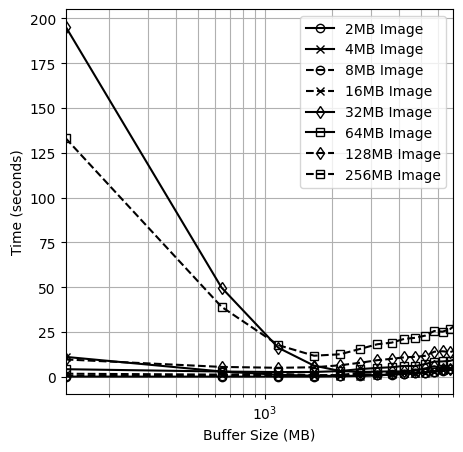

In [8]:
create_plot('csv/final/log_2MB_image.png.csv', '2MB Image', '-', 'o')
create_plot('csv/final/log_4MB_image.png.csv', '4MB Image', '-', 'x')
create_plot('csv/final/log_8MB_image.png.csv', '8MB Image', '--', 'o')
create_plot('csv/final/log_16MB_image.png.csv', '16MB Image', '--', 'x')
create_plot('csv/final/log_32MB_image.png.csv', '32MB Image', '-', 'd')
create_plot('csv/final/log_64MB_image.png.csv', '64MB Image', '-', 's')
create_plot('csv/final/log_128MB_image.png.csv', '128MB Image', '--', 'd')
create_plot('csv/final/log_256MB_image.png.csv', '256MB Image', '--', 's')








plt.xlabel('Buffer Size (MB)')
plt.ylabel('Time (seconds)')
# plt.ylim([0, 100])
plt.xlim([128,7000])
f = plt.gcf()
f.set_figwidth(5)  
f.set_figheight(5)
plt.grid(True, which='both')

plt.savefig('plots/buffer_size_comparison.svg', format='svg')
plt.show()

/var/folders/vc/q3dwbzbx5cq4zx43xhztb2v00000gn/T/ipykernel_879/2215261840.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_3072['PQC Cipher'] = 0.0002


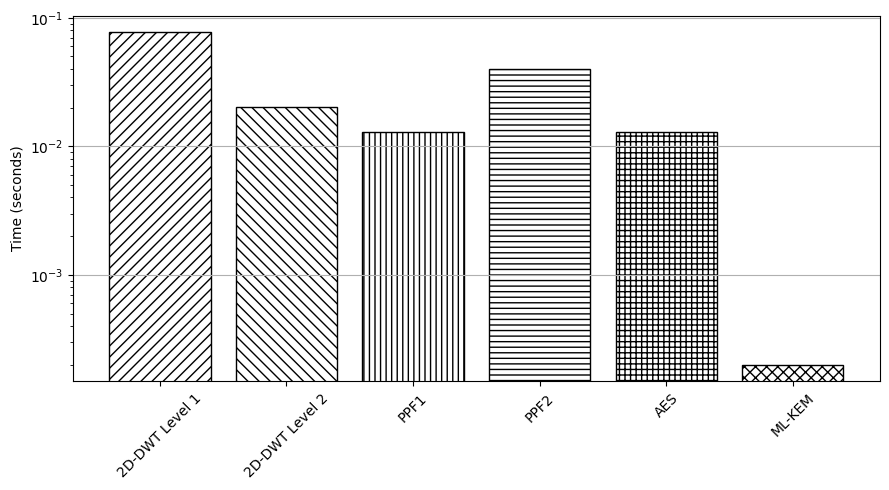

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_bar_plot(filePath):
    df = pd.read_csv(filePath)

    row_3072 = df[df['Buffer'] == 640]
    row_3072['PQC Cipher'] = 0.0002

    custom_labels = ['2D-DWT Level 1', '2D-DWT Level 2', 'PPF1', 'PPF2', 'AES', 'ML-KEM']
    
    data = row_3072.iloc[0, 1:].drop('_se_encrypt').drop('encrypt')
    
    # Define hatch patterns for each bar
    hatches = ['///', '\\\\\\', '|||', '---', '+++', 'xxx']  # Customize as desired

    plt.figure(figsize=(9, 5))
    
    # Create the bars with different hatch patterns
    bars = plt.bar(custom_labels, data, color='white', edgecolor='black')

    # Apply different hatches to each bar
    for i, bar in enumerate(bars):
        bar.set_hatch(hatches[i])
    
    plt.ylabel('Time (seconds)')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    
    plt.tight_layout()
    plt.savefig('plots/operations_time_comparison.svg', format='svg')

    plt.show()

create_bar_plot('csv/final/log_8MB_image.png.csv')


File Size: 4.0 MB, Percentage Difference: 21.47%
File Size: 8.0 MB, Percentage Difference: 62.77%
File Size: 16.0 MB, Percentage Difference: 41.76%
File Size: 32.0 MB, Percentage Difference: 68.31%
File Size: 64.0 MB, Percentage Difference: 69.43%
File Size: 128.0 MB, Percentage Difference: 60.92%
File Size: 256.0 MB, Percentage Difference: 52.43%


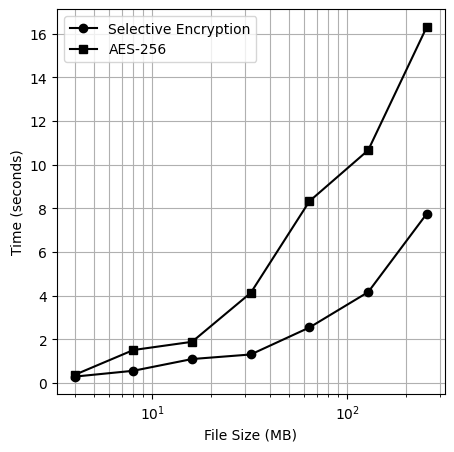

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_sizes = [4, 8, 16, 32, 64, 128, 256]  

#  at buffer size 640 X 640
selective_encryption_times = [0.2959, 0.5638, 1.1011, 1.3102, 2.5476, 4.1691, 7.7661]
aes_256_times = [0.3768, 1.5143, 1.8905, 4.1338, 8.3323, 10.6671, 16.3268]

df = pd.DataFrame({
    'file_size': file_sizes,
    'selective_encryption': selective_encryption_times,
    'aes_256': aes_256_times
})

df['selective_encryption_ma'] = df['selective_encryption'].rolling(window=3, min_periods=1).mean()
df['aes_256_ma'] = df['aes_256'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(5, 5))
plt.plot(df['file_size'], df['selective_encryption'], marker='o', label='Selective Encryption', color='black')
plt.plot(df['file_size'], df['aes_256'], marker='s', label='AES-256', color='black')

# plt.plot(df['file_size'], df['selective_encryption_ma'], linestyle='-', label='Selective Encryption (MA)')
# plt.plot(df['file_size'], df['aes_256_ma'], linestyle='-', label='AES-256 (MA)')

plt.xlabel('File Size (MB)')
plt.ylabel('Time (seconds)')
plt.xticks(file_sizes)
plt.xscale('log')
plt.grid(True, which='both')
plt.legend()

plt.savefig('plots/se_vs_aes_256.svg', format='svg')

df['percentage_difference'] = ((df['aes_256'] - df['selective_encryption']) / df['aes_256']) * 100

for idx, row in df.iterrows():
    print(f"File Size: {row['file_size']} MB, Percentage Difference: {row['percentage_difference']:.2f}%")


plt.show()
